In [5]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import utils
import os

In [21]:
num_agents = 200
num_iterations = 20
num_params = 25
params_names = ['CAThetaCutBarrel', 'CAThetaCutForward', 'dcaCutInnerTriplet', 'dcaCutOuterTriplet']
params_lb = [0.0, 0.0, 0.0, 0.0]
params_ub = [0.006, 0.03, 0.2, 1.0]

In [22]:
default = utils.read_csv("temp/default.csv")[0]
default_params = default[:num_params]
default_metrics = default[num_params:]

In [23]:
metrics = [pd.read_csv("history/iteration" + str(i) + ".csv", header=None, usecols=[num_params, num_params + 1]).transpose().to_numpy()
           for i in range(num_iterations)]


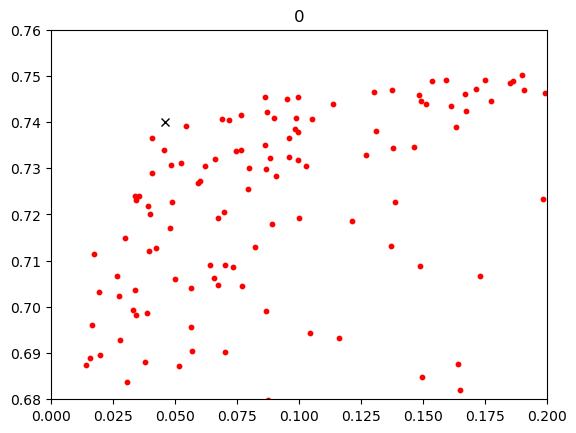

In [24]:
import matplotlib.animation as animation

fig, ax = plt.subplots()

def animate(i):
    fig.clear()
    ax = fig.add_subplot(111)
    ax.set_xlim(0., 0.2)
    ax.set_ylim(0.68, 0.76)
    # s = ax.scatter(metrics[0][1], 1 - metrics[0][0], s=10)
    s = ax.scatter(metrics[i][1], 1 - metrics[i][0], c="red", s=10)
    # s = ax.scatter(metrics[num_iterations - 1][1], 1 - metrics[num_iterations - 1][0], c="green", s=10)
    s = ax.plot([default_metrics[1]], [1 - default_metrics[0]], 'x', color='black')
    # ax.set_xlabel(r'fakes $=\frac{(N_{rec}-N_{ass})}{N_{rec}}$')
    # ax.set_ylabel(r'eff $=\frac{N_{ass}}{N_{sim}}$')
    # ax.legend(loc='best')
    ax.set_title(str(i))

ani=animation.FuncAnimation(fig, animate, interval=200, frames=range(num_iterations))
ani.save('temp/metrics.gif', writer='pillow')


In [25]:
pareto_front = utils.read_csv('checkpoint/pareto_front.csv')
pareto_front = pareto_front[pareto_front[:, num_params + 1].argsort()]
pareto_x = [particle[num_params + 1] for particle in pareto_front]

pareto_y = [1 - particle[num_params] for particle in pareto_front]
# pareto_z = [particle[6] for particle in pareto_front]
# pareto_t = [particle[5] + particle[6] for particle in pareto_front]

In [26]:
len(pareto_front)

164

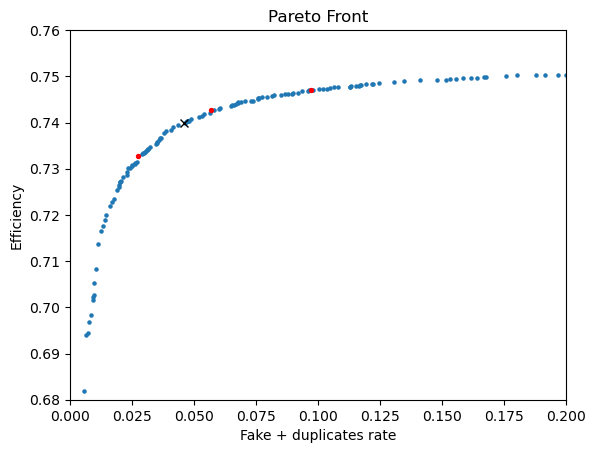

In [33]:
point1 = pareto_front[49]
point2 = pareto_front[80]
point3 = pareto_front[110]


plt.scatter(pareto_x, pareto_y, s=5)
plt.plot(default_metrics[1], 1 - default_metrics[0], 'x', color='black')
plt.scatter([point1[num_params + 1], point2[num_params + 1], point3[num_params + 1]], 
            [1 - point1[num_params], 1 - point2[num_params], 1 - point3[num_params]], color='red', s=8)
# plt.scatter([point1[5] + point1[6], point2[5] + point2[6], point3[5] + point3[6]], [1 - point1[4], 1 - point2[4], 1 - point3[4]], color='red', s=8)

# plt.scatter(point1[5], 1 - point1[4], color='red', s=8)
plt.xlim(0., 0.2)
plt.ylim(0.68, 0.76)
plt.xlabel("Fake + duplicates rate")
plt.ylabel("Efficiency")
plt.title("Pareto Front")
plt.savefig('../pf.png')
plt.show()


In [34]:
print([point1[i] for i in range(num_params)])
print([point2[i] for i in range(num_params)])
print([point3[i] for i in range(num_params)])

[0.001851203713804728, 0.003048534408297671, 0.10421495993889525, 0.1942557667631415, 0.5356517662084821, 14.623855197883326, 693.5643185734596, 650.7866127597496, 850.8553484970204, 778.0551529073974, 762.1618104732772, 718.6241036605276, 587.9988636939003, 657.2116850152181, 759.3350584247364, 1000.0, 805.087810817692, 620.3192757431423, 753.9149099506111, 581.7925226551158, 449.7106711769484, 729.6232189938648, 762.710086864152, 815.0023346892012, 567.3716722991325]
[0.002221209250571655, 0.004784546358194279, 0.1520475552890708, 0.26215141970455513, 0.48032901465393085, 13.993405719658753, 730.2979390285764, 781.9960375873275, 817.3381438558811, 828.7672519072521, 762.1035689855227, 602.9751392894896, 632.8974147897127, 575.767163561252, 797.1637181783434, 970.1409593039373, 817.2456843232899, 644.93644202167, 854.772018110287, 727.1469983930277, 620.0166697128521, 806.0582010293213, 777.0567302019095, 713.6262153699898, 736.22354852551]
[0.002645990016770937, 0.00823852591849894, 

In [35]:
selected_params = [default_params, point1[:num_params], point2[:num_params], point3[:num_params]]
# selected_params

In [36]:
utils.write_csv('MTV/selected_params.csv', selected_params)

In [43]:
print(point1)
print(point2)
print(point3)

[2.13289727e-03 5.04790742e-03 1.46848581e-01 2.10014200e-01
 4.09232945e-01 1.32041854e+01 7.43440868e+02 5.12264336e+02
 7.52132628e+02 6.31980008e+02 5.53127805e+02 7.83130414e+02
 5.56772883e+02 4.63523912e+02 4.00000000e+02 6.38721280e+02
 5.29179394e+02 7.08994742e+02 9.05222721e+02 8.98269445e+02
 9.18081985e+02 7.58046363e+02 5.08968801e+02 9.78864271e+02
 6.24102386e+02 2.91679088e-01 2.74256167e-01]
[3.12288994e-03 1.28754123e-02 1.98473617e-01 3.69037737e-01
 7.19432200e-01 1.22633506e+01 6.93627204e+02 5.16570660e+02
 9.93358919e+02 4.08733450e+02 5.12186081e+02 6.68351647e+02
 4.91814099e+02 5.54548042e+02 4.00000000e+02 7.13955282e+02
 4.00000000e+02 4.80262246e+02 1.00000000e+03 9.30322799e+02
 9.83769578e+02 4.00000000e+02 6.54469554e+02 5.35778558e+02
 6.04261198e+02 2.85136970e-01 3.44618328e-01]
[4.67593620e-03 1.37657479e-02 2.00000000e-01 5.14440151e-01
 4.67991815e-01 1.53323666e+01 6.86668549e+02 5.43074164e+02
 9.18578444e+02 4.55407161e+02 4.00000000e+02 7.3129

In [44]:
# for i in range(num_agents):
#     uproot_file = uproot.open("test.root")
#     tree = uproot_file['simpleValidation' + str(i)]['output']
#     total_rec = tree['rt'].array()[0]
#     total_ass = tree['at'].array()[0]
#     total_ass_sim = tree['ast'].array()[0]
#     total_dup = tree['dt'].array()[0]
#     total_sim = tree['st'].array()[0]
#     print("st: %d, ast: %d, rt: %d, at: %d, dt: %d, eff: %.5f, fake+dup: %.5f" % (total_sim, total_ass_sim, total_rec, total_ass, total_dup, total_ass_sim / total_sim, (total_rec - total_ass + total_dup) / total_rec))

